## **Overview**

PetMind is a retailer of products for pets. They are based in the United States.
PetMind sells products that are a mix of luxury items and everyday items. Luxury items include
toys. Everyday items include food.
The company wants to increase sales by selling more everyday products repeatedly.
They have been testing this approach for the last year.
They now want a report on how repeat purchases impact sales.

**Data description**

* **product_id**. Nominal. The unique identifier of the product.
Missing values are not possible due to the database structure.

* **category**. Nominal. The category of the product, one of 6 values (Housing,
Food, Toys, Equipment, Medicine, Accessory).
Missing values should be replaced with “Unknown”.

* **animal**. Nominal. The type of animal the product is for. One of Dog, Cat,
Fish, Bird.
Missing values should be replaced with “Unknown”.

* **size**. Ordinal. The size of animal the product is for. Small, Medium,
Large.
Missing values should be replaced with “Unknown”.

* **price**. Continuous. The price the product is sold at. Can be any positive
value, round to 2 decimal places.
Missing values should be replaced with the overall median price.

* **sales**. Continuous. The value of all sales of the product in the last year.
This can be any positive value, rounded to 2 decimal places
Missing values should be replaced with the overall median sales.

* **rating**. Discrete. Customer rating of the product from 1 to 10.
Missing values should be replaced with 0.

* **repeat_purchase**. Nominal. Whether customers repeatedly buy the product (1) or not (0). Missing values should be removed.


## **Tasks**

Submit your answers directly in the workspace provided.

1. For every column in the data:
  * State whether the values match the description given in the table above.
  * State the number of missing values in the column.
  * Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many products are repeat purchases. Use the visualization to:
  * State which category of the variable repeat purchases has the most observations
  * Explain whether the observations are balanced across categories of the
variable repeat purchases

3. Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

4. Describe the relationship between repeat purchases and sales. Your answer must include a visualization to demonstrate the relationship.

# **1. Data cleaning**

For every column in the data:

  * State whether the values match the description given in the table above.

  * State the number of missing values in the column.

  * Describe what you did to make values match the description if they did not
match.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('pet_supplies_2212.csv')

In [ ]:
data.shape

(1500, 8)

In [ ]:
data.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [ ]:
data.tail()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,small,19.94,658.66,5.0,1
1499,1500,Food,Cat,Medium,25.95,826.08,4.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [ ]:
data.describe(include = "all")

,product_id,category,animal,size,price,sales,rating,repeat_purchase
count,1500.000000,1500,1500,1500,1500,1500.000000,1350.000000,1500.000000
unique,NaN,7,4,9,707,NaN,NaN,NaN
top,NaN,Equipment,Cat,small,unlisted,NaN,NaN,NaN
freq,NaN,370,567,372,150,NaN,NaN,NaN
mean,750.500000,NaN,NaN,NaN,NaN,996.597847,4.991111,0.604000
std,433.157015,NaN,NaN,NaN,NaN,323.952676,1.559755,0.489228
min,1.000000,NaN,NaN,NaN,NaN,286.940000,1.000000,0.000000
25%,375.750000,NaN,NaN,NaN,NaN,747.420000,4.000000,0.000000
50%,750.500000,NaN,NaN,NaN,NaN,1000.830000,5.000000,1.000000
75%,1125.250000,NaN,NaN,NaN,NaN,1158.157500,6.000000,1.000000


In [ ]:
data_cleared = data

**product_id**. The column had 1500 unique values, as expected.

In [ ]:
data_cleared['product_id'] = data_cleared['product_id'].astype(object)

In [ ]:
len(data_cleared['product_id'].unique())

1500

**category**. The column had 25 missing values (written as '-'). They were replaced with 'Unknown' according to the condition. The column has 6 unique categories (Housing, Food, Toys, Equipment, Medicine, Accessory) and the category 'Unknown'.

In [ ]:
data_cleared['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       '-'], dtype=object)

In [ ]:
len(data_cleared[data_cleared['category'] == '-'])

25

In [ ]:
data_cleared.loc[data_cleared['category'] == '-', 'category'] = 'Unknown'

In [ ]:
data_cleared['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [ ]:
len(data_cleared['category'])

1500

**animal**. The values in the column correspond to one of the categories (Dog, Cat, Fish, Bird), there are no missing values.

In [ ]:
data_cleared['animal'].unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [ ]:
len(data_cleared['animal'])

1500

**size**. the column contained different kinds of entries of the same categories (e.g. 'large', 'MEDIUM', 'medium'), so I reduced them to the same format and got three unique categories (Small, Medium, Large), as requested. There are no missing values.

In [ ]:
data_cleared['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [ ]:
data_cleared['size'] = data_cleared['size'].str.lower()

In [ ]:
data_cleared['size'] = data_cleared['size'].str.capitalize()

In [ ]:
data_cleared['size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [ ]:
len(data_cleared['size'])

1500

**price**. The column contained 150 missing values (written as 'unlisted'). That's why I first replaced them with 0, then converted the column to the necessary format (float, rounded to 2 decimal places), calculated the median and replaced 0 with the median value.

In [ ]:
data_cleared['price'].unique()

array(['51.1', '35.98', '31.23', '24.95', '26.18', '30.77', '31.04',
       '28.9', '17.82', '24.93', '40.87', '34.96', '31.07', '40.8',
       '33.13', '43.09', '28.29', '43.91', '33.87', '44', 'unlisted',
       '41', '32.98', '22.99', '38.99', '45.83', '28.24', '28.19',
       '27.79', '38.86', '22.89', '26.07', '28.02', '23.99', '28.25',
       '30.87', '28.09', '29.01', '26.13', '54.03', '31.2', '30.92',
       '20.95', '17.98', '27.7', '24.8', '31.09', '19.83', '33.15',
       '21.25', '38.06', '30.89', '35.04', '26.03', '33.94', '25.81',
       '32.99', '17.9', '30.96', '40.93', '24.98', '26.08', '23.08', '26',
       '22.95', '39.03', '23.19', '31', '21.05', '31.5', '24.7', '27.76',
       '18.06', '28.43', '43.99', '41.03', '28.28', '25.96', '27.86',
       '38.95', '36.22', '23.02', '21.14', '42.99', '27.95', '38', '28.2',
       '39.16', '25.07', '15', '35.95', '30.03', '22.98', '27.97',
       '28.74', '26.05', '45.99', '25.83', '22.75', '28.03', '29.02',
       '26.32', '2

In [ ]:
len(data[data['price'] == 'unlisted'])

150

In [ ]:
data_cleared.loc[data_cleared['price'] == 'unlisted', 'price'] = 0

In [ ]:
data_cleared['price'] = data_cleared['price'].astype(float)

In [ ]:
med = data_cleared['price'].median()

In [ ]:
data_cleared.loc[data_cleared['price'] == 0, 'price'] = med

In [ ]:
data_cleared['price'] = data_cleared['price'].round(decimals=2)

**rating**. The column contained 150 missing values, I replaced them with 0 as requested. The rating values vary from 1 to 9 (except for the replaced values), so they're all within the expected range

In [ ]:
data_cleared['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [ ]:
len(data[(data['rating'].isna()) == True])

150

In [ ]:
data_cleared['rating'] = data_cleared['rating'].fillna(0)

In [ ]:
len(data_cleared['rating'])

1500

**sales**. The column corresponded to the format, there were no missing values.

In [ ]:
data_cleared['sales'].unique()

array([1860.62,  963.6 ,  898.3 , ..., 1099.97,  724.02,  826.08])

In [ ]:
len(data_cleared['sales'])

1500

**repeat_purchase**. The column matched the format (0, 1), no missing values.

In [ ]:
data_cleared['repeat_purchase'].unique()

array([1, 0])

In [ ]:
len(data_cleared['repeat_purchase'])

1500

In [ ]:
data_cleared

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7.0,1
1,2,Housing,Bird,Medium,35.98,963.60,6.0,0
2,3,Food,Dog,Medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,Small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
...,...,...,...,...,...,...,...,...
1495,1496,Food,Bird,Medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,Small,32.89,1099.97,5.0,0
1497,1498,Food,Fish,Small,25.79,724.02,3.0,0
1498,1499,Medicine,Fish,Small,19.94,658.66,5.0,1


The source data consists of 1500 rows and 8 columns. The first thing I did was to check all the columns for compliance.

* product_id. The column had 1500 unique values, as expected.
* category. The column had 25 missing values (written as '-'). I replaced them with 'Unknown' according to the condition. The column has 6 unique categories (Housing, Food, Toys, Equipment, Medicine, Accessory) and the category 'Unknown'.
* animal. The values in the column correspond to one of the categories (Dog, Cat, Fish, Bird), there are no missing values.
* size. the column contained different kinds of entries of the same categories (e.g. 'large', 'MEDIUM', 'medium'), so I reduced them to the same format and got three unique categories (Small, Medium, Large), as requested. There are no missing values.
* price. The column contained 150 missing values (written as 'unlisted'). That's why I first replaced them with 0, then converted the column to the necessary format (float, rounded to 2 decimal places), calculated the median and replaced 0 with the median value.
* sales. The column corresponded to the format, there were no missing values.
* rating. The column contained 150 missing values, I replaced them with 0 as requested. The rating values vary from 1 to 9 (except for the replaced values), so they're all within the expected range
* repeat_purchase. The column matched the format (0, 1), no missing values.

# **2. Create a visualization that shows how many products are repeat purchases**

Use the visualization to:
  * State which category of the variable repeat purchases has the most
observations

  * Explain whether the observations are balanced across categories of the
variable repeat purchases


In [ ]:
total = data_cleared[['category', 'repeat_purchase']].groupby('category', as_index=False) \
                                                     .count() \
                                                     .rename(columns={'repeat_purchase':'all_purchase_cnt'})

In [ ]:
repeat = data_cleared[['category', 'repeat_purchase']][data_cleared['repeat_purchase'] == 1].groupby('category', as_index=False) \
                                                                                            .count() \
                                                                                            .rename(columns={'repeat_purchase':'repeat_purchase_cnt'})

In [ ]:
merged = total.merge(repeat, on='category')

In [ ]:
merged.head()

,category,all_purchase_cnt,repeat_purchase_cnt
0,Accessory,126,70
1,Equipment,370,221
2,Food,260,151
3,Housing,227,152
4,Medicine,237,153


In [ ]:
categories = merged.category.tolist()
categories = categories[:-1]

In [ ]:
import plotly.graph_objects as go

categories=categories

fig = go.Figure(data=[
    go.Bar(name='Total purchases',
           x=categories, 
           y=merged['all_purchase_cnt'], 
           text=merged['all_purchase_cnt'], 
           textposition = 'outside',  
           outsidetextfont= dict(size=12),
           opacity = 0.90, 
           hovertemplate='Category: %{label}<br>Purchase quantities: %{y}'),
    go.Bar(name='Repeat purchase', 
           x=categories, 
           y=merged['repeat_purchase_cnt'], 
           marker = {"color": "indianred"}, 
           text=merged['repeat_purchase_cnt'], 
           textposition = 'outside',  
           outsidetextfont = dict(size=12),
           opacity = 0.90, 
           hovertemplate='Category: %{label}<br>Repeat purchase quantities: %{y}')
])

fig.update_layout(barmode='group')

fig.update_layout(title='Ratio of primary and repeat purchases by category',
                  xaxis_title='Category',
                  yaxis_title='Amount of purchases')
fig.show('notebook')

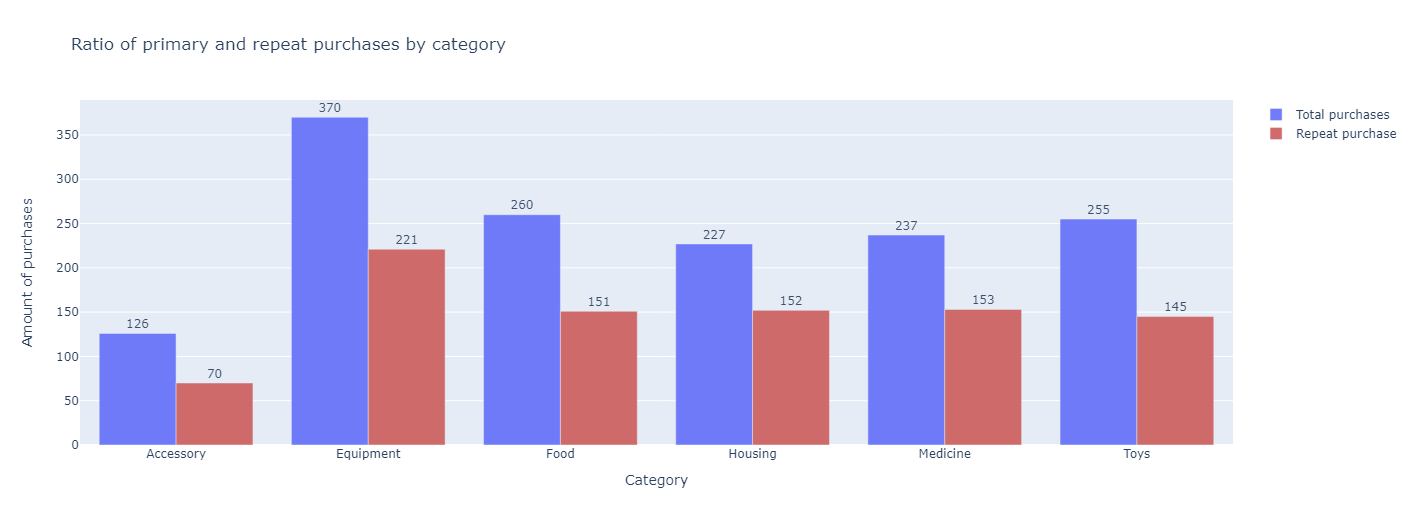

This data includes six possible product categories (excluding the 'Unknown' category). The most common product category is Equipment; products from this category are also most often reordered. Primary and repeat sales from the categories Food, Housing, Medicine and Toys are distributed almost equally, while the number of sales from the Accessory category is significantly lower. This suggests that the PetMind team should focus on increasing the number of repeat sales of goods in the Equipment category, as it is the most promising.



# **3. Describe the distribution of all of the sales**

Your answer must include a visualization that shows the distribution.

In [ ]:
import plotly.express as px

fig = px.histogram(data_cleared, x="sales",
                   title='Distribution of sales',
                   labels={'sales':'Sales'}, 
                   opacity=0.9,
                   color_discrete_sequence=['indianred']
)
fig.show('notebook')

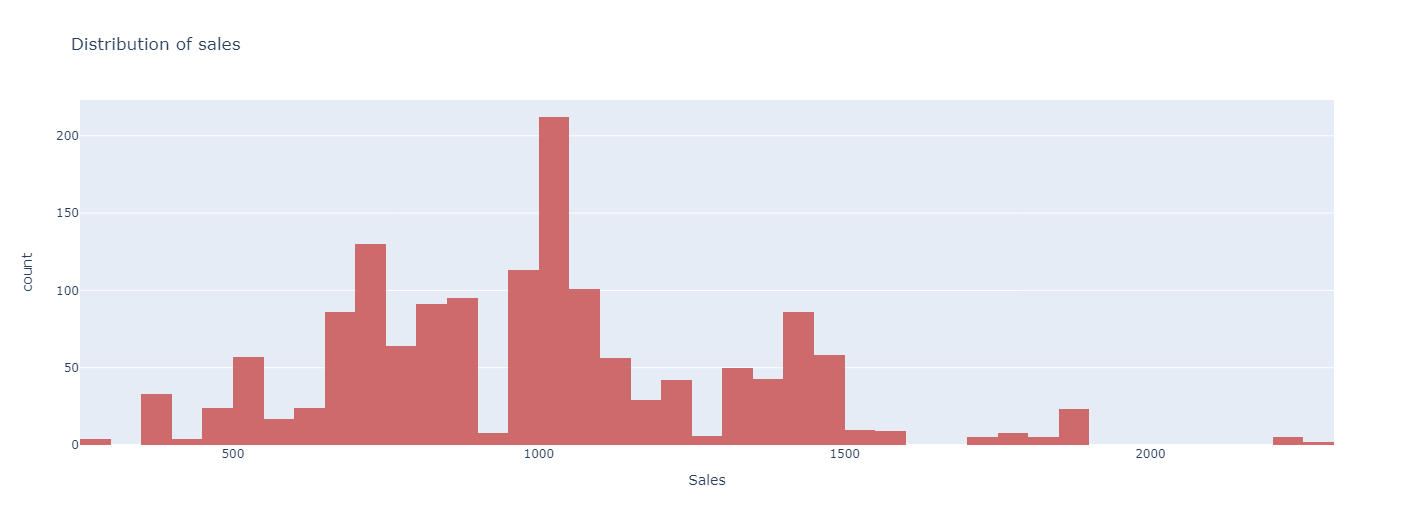

Since the sum of all sales of each product in the last year is important, we have to look at how the amount of sales is distributed. Looking at all sales, we see that the most products are bought for the amount of 1,000 to 1,050. The majority of all sales lie between 650 and 1450. There are some outliers, a small number of products bought for under 300 and from 2,200, but this is very rare. When looking for points of growth, the team should focus on a large number of sales of goods in the middle price range.

# **4. Describe the relationship between repeat purchases and sales**

Your answer must include a visualization to demonstrate the relationship

In [ ]:
repeat_sales = data_cleared[['category', 'sales']][data_cleared['repeat_purchase'] == 1].groupby('category', as_index=False) \
                                                                                        .sum() \
                                                                                        .rename(columns={'sales':'repeat_sales'})

In [ ]:
repeat_sales.head()

,category,repeat_sales
0,Accessory,63399.72
1,Equipment,205413.27
2,Food,166821.05
3,Housing,118031.21
4,Medicine,134637.06


In [ ]:
not_repeat_sales = data_cleared[['category', 'sales']][data_cleared['repeat_purchase'] == 0].groupby('category', as_index=False) \
                                                                                            .sum() \
                                                                                            .rename(columns={'sales':'not_repeat_sales'})
not_repeat_sales

,category,not_repeat_sales
0,Accessory,57873.72
1,Equipment,143461.97
2,Food,120317.11
3,Housing,57299.10
4,Medicine,79429.19
5,Toys,139865.35
6,Unknown,12604.16


In [ ]:
total_sales = data_cleared[['category', 'sales']].groupby('category', as_index=False) \
                                                 .sum() \
                                                 .rename(columns={'sales':'total_sales'})
total_sales

,category,total_sales
0,Accessory,121273.44
1,Equipment,348875.24
2,Food,287138.16
3,Housing,175330.31
4,Medicine,214066.25
5,Toys,319897.10
6,Unknown,28316.27


In [ ]:
merged_sales = repeat_sales.merge(not_repeat_sales, on='category') \
                           .merge(total_sales, on='category')

In [ ]:
merged_sales['repeat_sales_%'] = round((merged_sales['repeat_sales'] / merged_sales['total_sales']) * 100, 2)

In [ ]:
merged_sales['not_repeat_sales_%'] = round((merged_sales['not_repeat_sales'] / merged_sales['total_sales']) * 100, 2)

In [ ]:
merged_sales

,category,repeat_sales,not_repeat_sales,total_sales,repeat_sales_%,not_repeat_sales_%
0,Accessory,63399.72,57873.72,121273.44,52.28,47.72
1,Equipment,205413.27,143461.97,348875.24,58.88,41.12
2,Food,166821.05,120317.11,287138.16,58.10,41.90
3,Housing,118031.21,57299.10,175330.31,67.32,32.68
4,Medicine,134637.06,79429.19,214066.25,62.90,37.10
5,Toys,180031.75,139865.35,319897.10,56.28,43.72
6,Unknown,15712.11,12604.16,28316.27,55.49,44.51


In [ ]:
import numpy as np
import plotly.graph_objects as go

category=categories

fig = go.Figure(data=[
    go.Bar(name='Repeated sales', 
           x=category, 
           y=merged_sales['repeat_sales'], 
           text = merged_sales['repeat_sales_%'], 
           textposition = 'inside',  
           outsidetextfont= dict(size=12)),
    go.Bar(name='Not repeat sales', 
           x=category, 
           y=merged_sales['not_repeat_sales'], 
           text = merged_sales['not_repeat_sales_%'], 
           textposition = 'outside',  
           outsidetextfont= dict(size=12), 
           marker = {"color": "indianred"})
])

fig.update_layout(barmode='stack')
fig.update_traces(texttemplate='%{text}%', textposition='inside')
fig.update_layout(title='Distribution of the sales amount of repeat and not repeated purchases by category',
                  xaxis_title='Category',
                  yaxis_title='Sales')


fig.show('notebook')

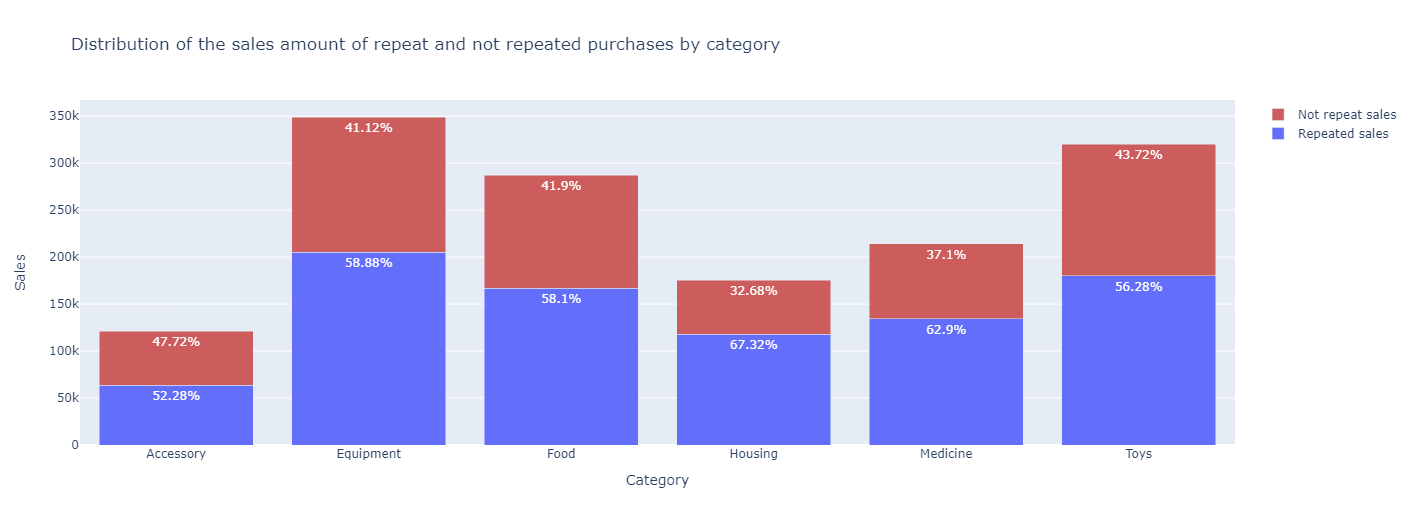

We want to see which categories are more repeat buyers and how the amount of repeat sales relates to the sum of all sales in each category.

We can see that the average percentage of repeat sales ranges from 52-58 percent, with Housing and Medicine having the highest percentages (67 and 63 percent, respectively). However, despite the average percentage of repeat sales, items in the Equipment category make the most profit due to the highest volume of all sales.

Since the Food, Housing, and Medicine product categories have a fairly high percentage of repeat sales, but the total volume is much lower than in the Equipment category, we can recommend focusing on increasing the total number of sales in those categories.

In [ ]:
import numpy as np
import plotly.graph_objects as go

category=categories

fig = go.Figure(data=[
    go.Bar(name='All sales', 
           x=category, 
           y=merged_sales['total_sales'], 
           text = merged_sales['total_sales'], 
           textposition = 'inside', 
           texttemplate='%{text:.2s}', 
           outsidetextfont= dict(size=12)),
    go.Bar(name='Repeated sales', 
           x=category, 
           y=merged_sales['repeat_sales'], 
           text = merged_sales['repeat_sales_%'], 
           textposition = 'inside', 
           texttemplate='%{y:.2s}<br>%{text}%',  
           outsidetextfont= dict(size=12), 
           marker = {"color": "indianred"})
])

fig.update_layout(barmode='group')
fig.update_layout(title='Relationship between total sales and repeat purchases by category',
                  xaxis_title='Category',
                  yaxis_title='Sales')


fig.show('notebook')

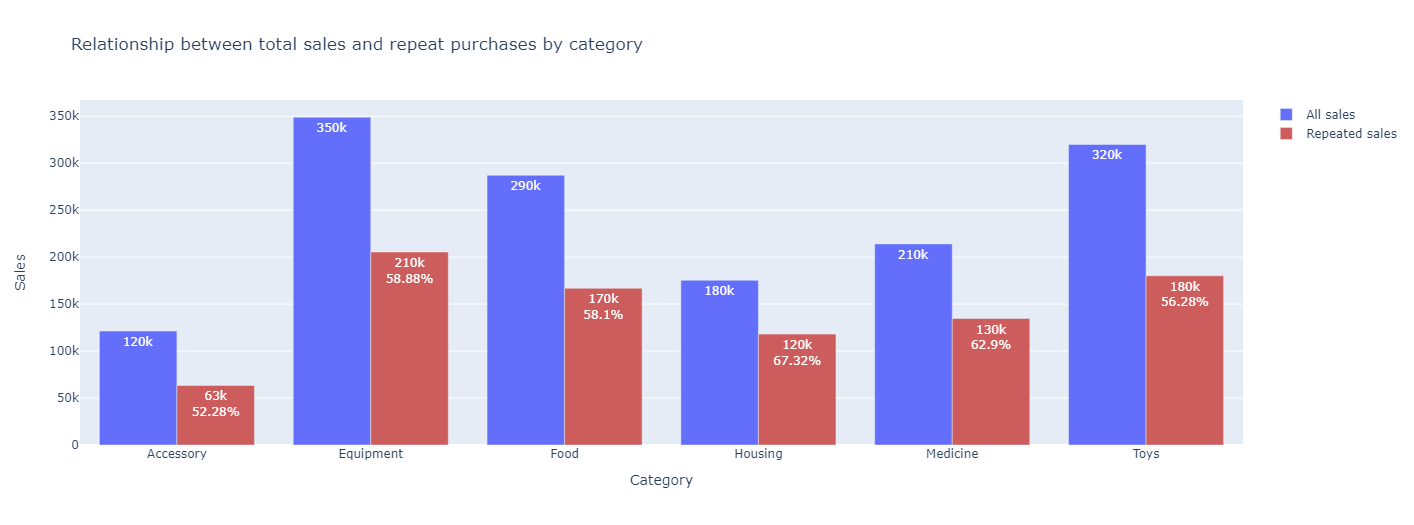

Now let's look at the total ratio of repeat sales to all sales for last year. We can see that the amount of repeat sales is a little more than half of all sales (59.1%). A more thorough analysis is needed to assess how the proportion of repeat sales to total sales has changed over the past year, since we do not have historical data on what the ratio was before. Also, we need to clarify if any categories other than Food are included in the concept of "Everyday products".

In [ ]:
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

fig = px.pie(data_cleared, values='sales', 
             names='repeat_purchase',
             color='repeat_purchase',
             color_discrete_map={0 : 'royalblue',
                                 1 :'indianred'},
             title='Ratio of repeat sales to all sales')

newnames = {0: 'Not repeated purchase', 1: 'Repeated purchase'}

fig.for_each_trace(lambda t: t.update(labels=[newnames[label] for label in t.labels]))

fig.show('notebook')

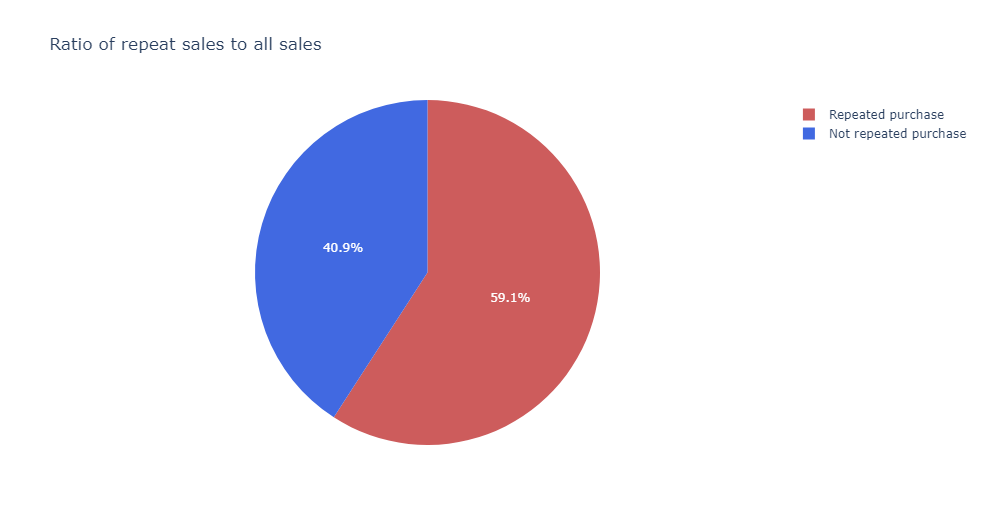

Based on the data we have and our analysis of it, we can recommend focusing on increasing total sales of Housing and Medicine products, since they have a high repeat purchase rate, and paying attention to increasing repeat sales in Equimpent and Food categories, because while total sales are high, repeat sales in these categories are lower.